# EDA on Placement_Data_Full_Class

In [1]:
#import required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


<pre>
About dataset.............
"Placement_Data_Full_Class.csv" is a CSV file that contains data on the placement of students from a management school in India. The dataset contains information on various attributes of the students, such as their gender, secondary education percentage, degree specialization, work experience, and placement status, among others.

sl_no: Serial number of the record
gender: Gender of the student (M or F)
ssc_p: Secondary education percentage
ssc_b: Secondary education board (Central/Other)
hsc_p: Higher secondary education percentage
hsc_b: Higher secondary education board (Central/Other)
hsc_s: Higher secondary education specialization
degree_p: Degree percentage
degree_t: Degree specialization
workex: Work experience (Yes/No)
etest_p: Employability test percentage
specialisation: Post-graduation specialization (Mkt&HR/Mkt&Fin)
mba_p: MBA percentage
status: Placement status (Placed/Not Placed)
salary: Salary offered (only for placed students)
</pre>

In [2]:
#load data set
df=pd.read_csv("Placement_Data_Full_Class.csv")

# no need of sl_no column so we will drop it
df=df.drop("sl_no", axis=1)#axis=0 means drop row ,axis=1 means drop a column
#first 5 observation
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# checking for rows and columns
df.shape

(215, 14)

In [32]:
df.info()
#67 Missing values found in column salary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [39]:
#view full data set
#print(df.to_string())

In [4]:
#view columns
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [5]:
#description of the data set
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
#count the number of duplicate rows
df.duplicated().sum()
#df = df.drop_duplicates() #to remove duplicate rows

0

In [11]:
#count the number of unique values in each column
df.nunique()

gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [12]:
import warnings
warnings.filterwarnings('ignore')
#ignore warnings

In [40]:
#checking for data types
print(df.dtypes)


gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object


In [41]:

'''
Qualitative (8 variables)
-----------------------

gender             object

ssc_b              object #['Others' 'Central']

hsc_b              object #['Others' 'Central']
hsc_s              object #['Commerce' 'Science' 'Arts']

degree_t           object #['Sci&Tech' 'Comm&Mgmt' 'Others']
workex             object #['No' 'Yes']

specialisation     object #['Mkt&HR' 'Mkt&Fin']

status             object #['Placed' 'Not Placed']

'''
'''
Quantitative (6 variables)
-----------------------


ssc_p             float64

hsc_p             float64

degree_p          float64

etest_p           float64

mba_p             float64

salary            float64
'''

'\nQuantitative (6 variables)\n-----------------------\n\n\nssc_p             float64\n\nhsc_p             float64\n\ndegree_p          float64\n\netest_p           float64\n\nmba_p             float64\n\nsalary            float64\n'

In [42]:

#View the levels of the qualitative variable
print(df['gender'].unique())

print(df['ssc_b'].unique())
print(df['hsc_b'].unique())

print(df['hsc_s'].unique())

print(df['degree_t'].unique())

print(df['workex'].unique())

print(df['specialisation'].unique())

print(df['status'].unique())


['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [14]:
#count the number of occurrences of each unique value 
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [ ]:
'''
Quantitative (6 variables)
-----------------------


ssc_p             float64

hsc_p             float64

degree_p          float64

etest_p           float64

mba_p             float64

salary            float64
'''

In [15]:
# checking for null values
df.isnull().sum()
#note that not placed categories salary in null (so it is not dirty data)

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

## Bar plot (one category variable)

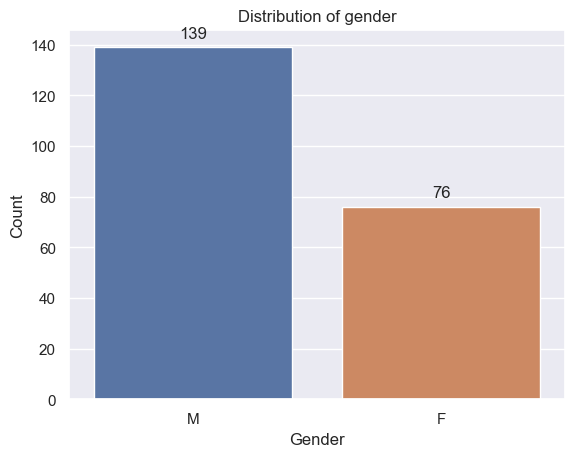

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

ax = sns.countplot(x='gender',data=df)

plt.title("Distribution of gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()


## Piechart (one category variable)
* seaborn does not have pie plot function
* use plt instead of it

In [17]:
#this is the data frame only consists male's data (sub dataframe)
df[df['gender'] == 'M']

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [18]:
#dimention of sub (males) data set
df[df['gender'] == 'M'].shape

(139, 14)

In [19]:
#number of rows in sub (males) data set
df[df['gender'] == 'M'].shape[0]

139

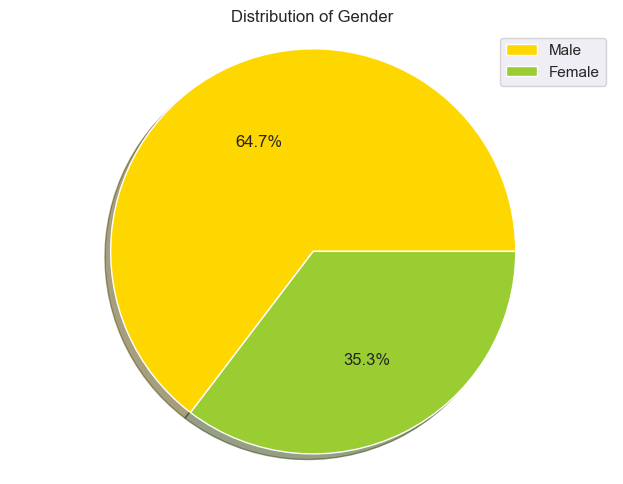

In [20]:
# Calculate the number of males and females
male_count = df[df['gender'] == 'M'].shape[0]
female_count = df[df['gender'] == 'F'].shape[0]

# Plot the pie chart
sizes = [male_count, female_count]
labels = ['Male', 'Female']
colors = ['gold', 'yellowgreen']
#explode = (0.05,0) # explode the 1st slice(Male)
explode = (0,0)
patches, texts, autotexts = plt.pie(sizes, colors=colors, shadow=True, explode=explode, autopct='%1.1f%%')
# The parameter '%1.1f%%' means to display the percentage with one decimal place.
plt.legend(patches, labels, loc="upper right")
plt.axis('equal')
plt.tight_layout()
plt.title("Distribution of Gender")
plt.show()


## Multiple bar chart (two categorical variables)

In [146]:
# checking the number of peoples in Secondary education board using gender
df.groupby("ssc_b")['gender'].value_counts()

ssc_b    gender
Central  M         74
         F         42
Others   M         65
         F         34
Name: gender, dtype: int64

C:\Users\Fathir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Gender and SSC Board in Placement Data')

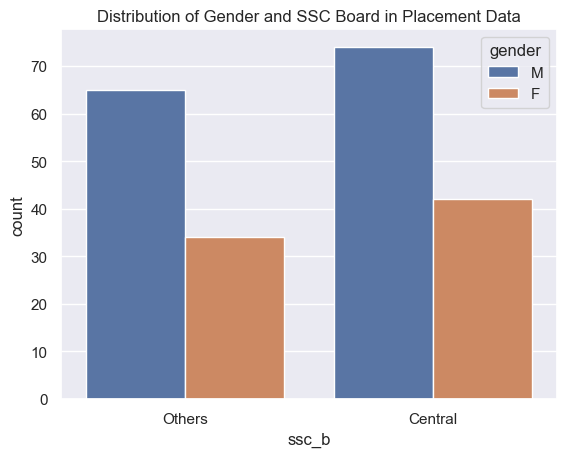

In [147]:
# checking for gender
sns.countplot('ssc_b', hue='gender', data=df);
#ignore warnings
plt.title("Distribution of Gender and SSC Board in Placement Data")

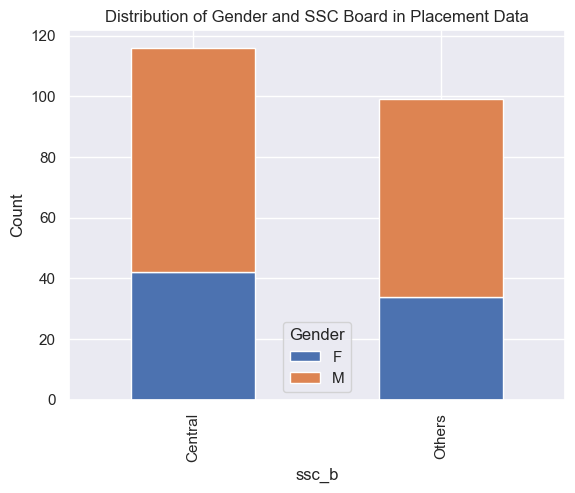

In [148]:

# Group the data by "gender" and "ssc_b" variables and count the number of occurrences
grouped_data = data.groupby(["ssc_b","gender"]).size().unstack()

# Create the stacked bar chart
grouped_data.plot(kind="bar", stacked=True)

# Add labels and titles
plt.title("Distribution of Gender and SSC Board in Placement Data")
plt.xlabel("ssc_b")
plt.ylabel("Count")
plt.legend(title="Gender")

# Show the chart
plt.show()


## Histogram (one numerical variable)

C:\Users\Fathir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='degree_p', ylabel='Density'>

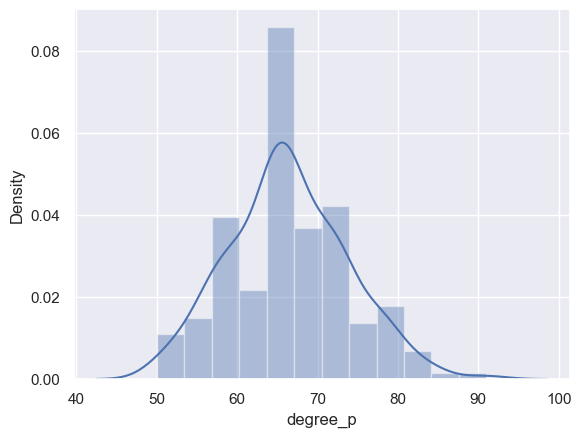

In [156]:
sns.distplot(df['degree_p'])
# Safe to ignore warnings

C:\Users\Fathir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='degree_p'>

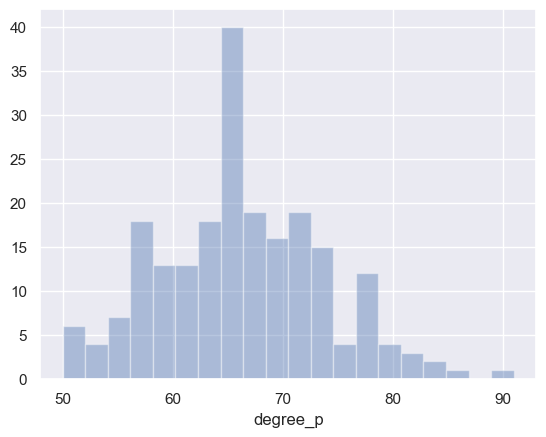

In [160]:
sns.distplot(df['degree_p'],kde=False,bins=20)

## Box plot & Violin plot (one numerical variable)

<AxesSubplot:xlabel='degree_p'>

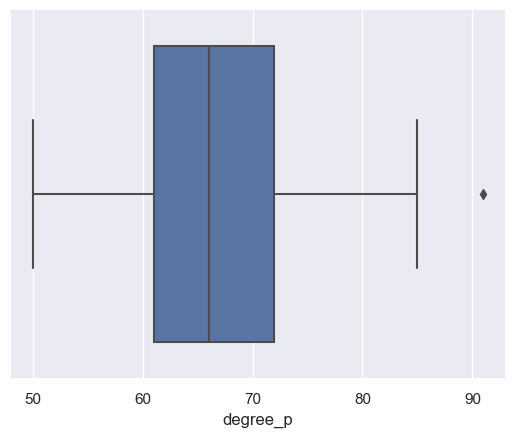

In [169]:
sns.boxplot(x="degree_p", data=df)

Text(0.5, 1.0, 'violin plot of degree percentage')

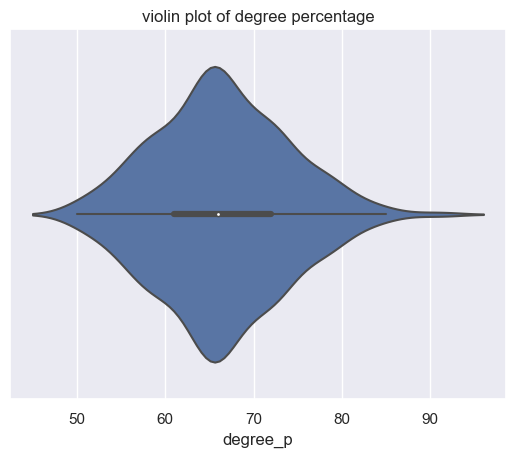

In [24]:
sns.violinplot(x="degree_p", data=df)
plt.title("violin plot of degree percentage")

## Scatter plot  (two numerical variables)

<AxesSubplot:xlabel='degree_p', ylabel='ssc_p'>

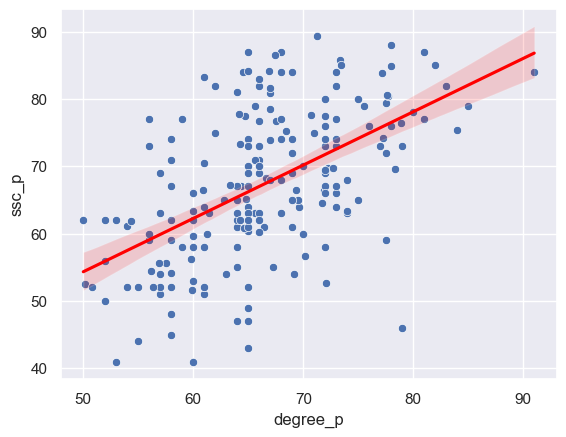

In [167]:
sns.scatterplot(x="degree_p",y="ssc_p",data=df)
#add trendline
sns.regplot(x="degree_p", y="ssc_p", data=data, scatter=False, color='red')


In [168]:
corr_coeff = data["degree_p"].corr(data["ssc_p"])

# Print the correlation coefficient
print("Correlation Coefficient: ", corr_coeff)

Correlation Coefficient:  0.5384039990695755


In [149]:
# Matrix form for correlation data
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


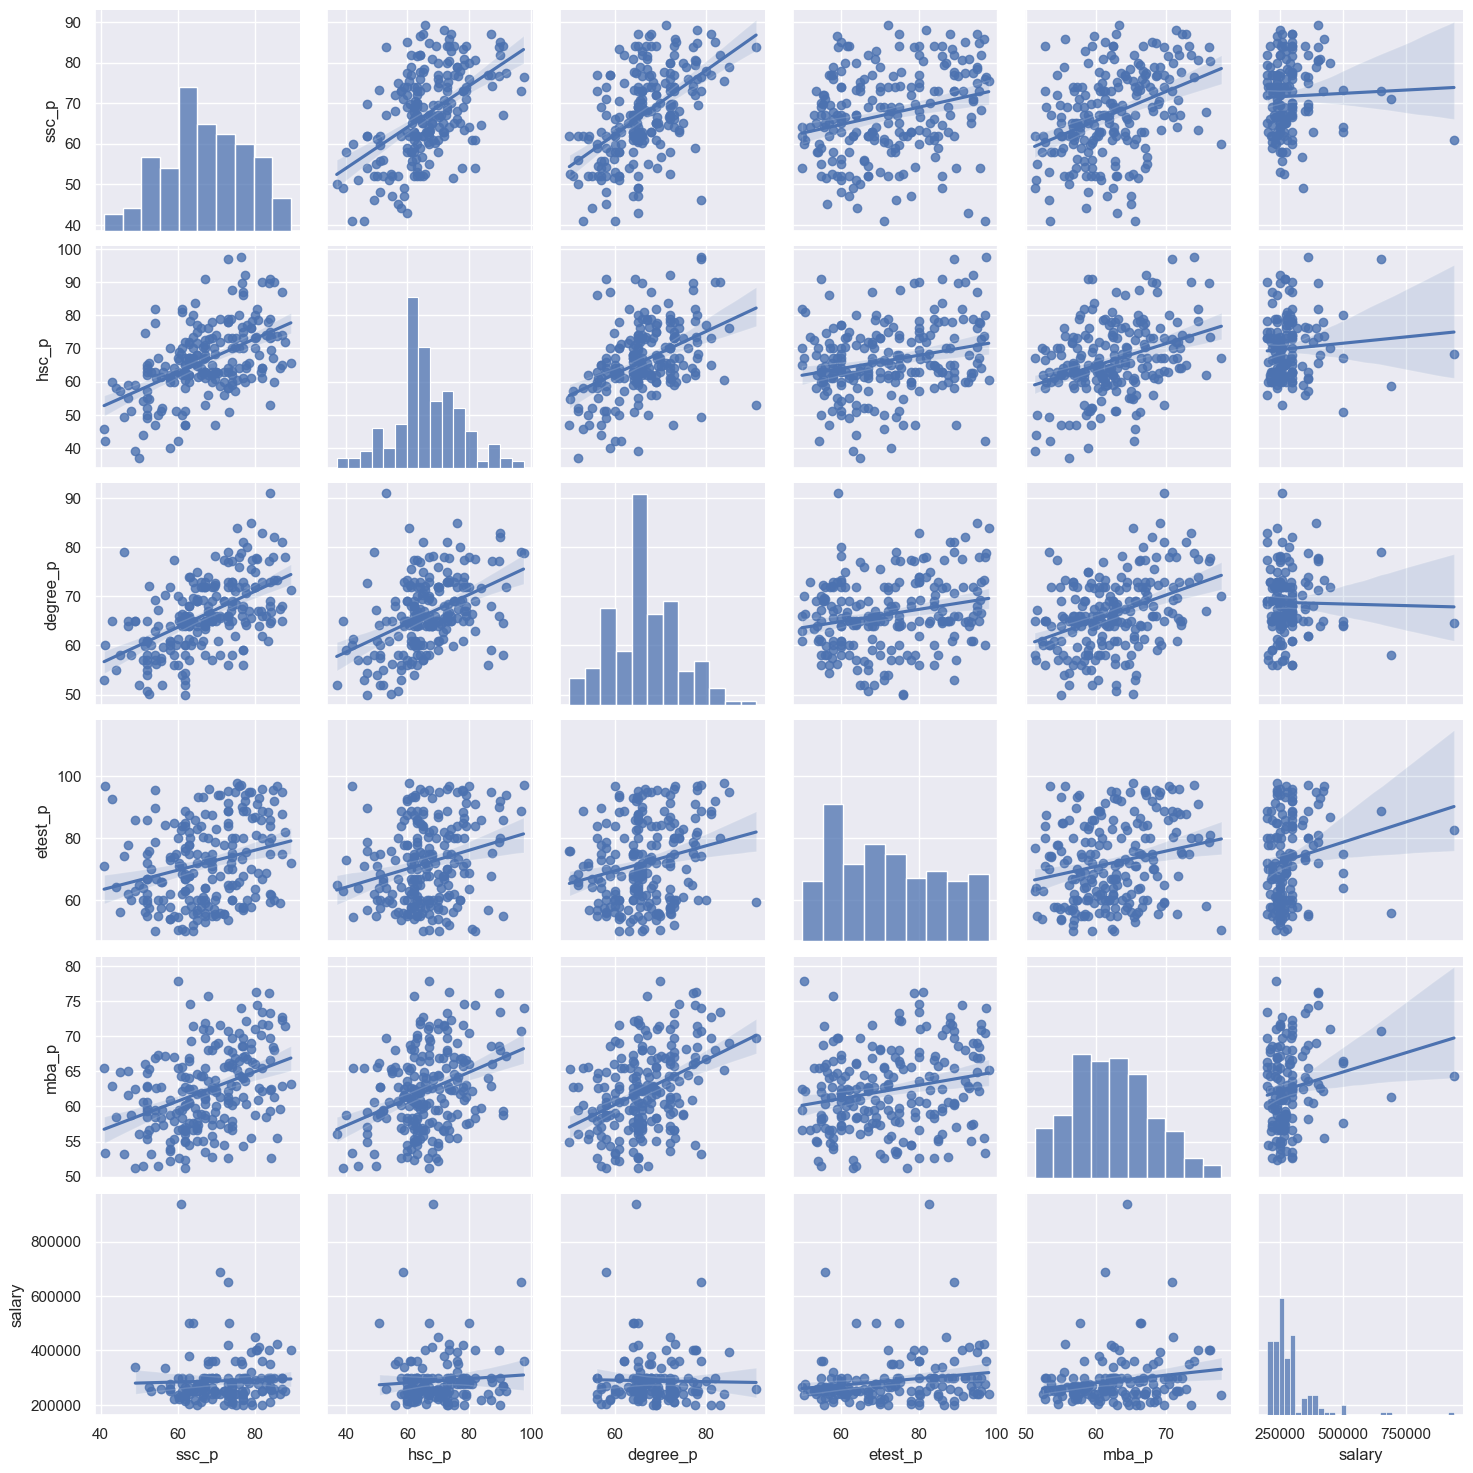

In [151]:
# Create the pairplot with a trendline
sns.pairplot(data=df,kind="reg")

<AxesSubplot:>

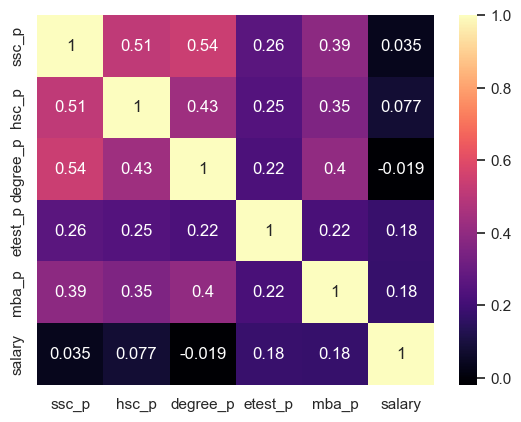

In [150]:
#heat map
sns.heatmap(df.corr(),cmap='magma',annot=True)

##  Box plot & Violin plot (Categarical * Numerical)

<AxesSubplot:xlabel='degree_t', ylabel='mba_p'>

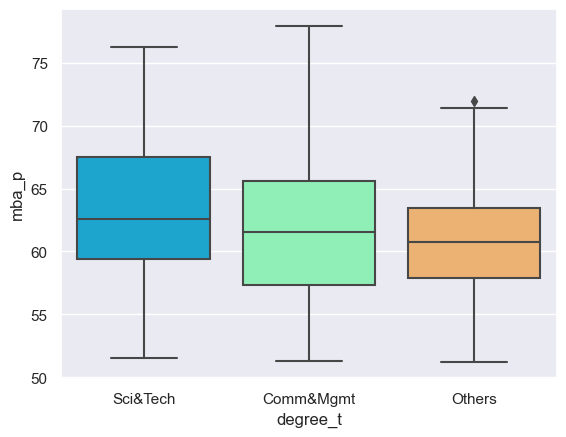

In [174]:
sns.boxplot(x="degree_t", y="mba_p", data=df,palette='rainbow')

<AxesSubplot:xlabel='degree_t', ylabel='mba_p'>

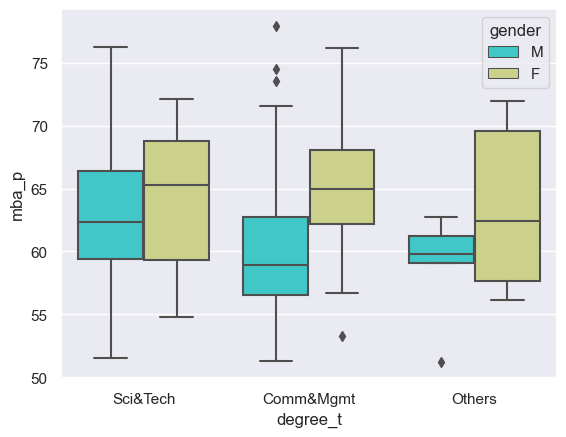

In [176]:
sns.boxplot(x="degree_t", y="mba_p", data=df,palette='rainbow',hue="gender")

<AxesSubplot:xlabel='degree_t', ylabel='mba_p'>

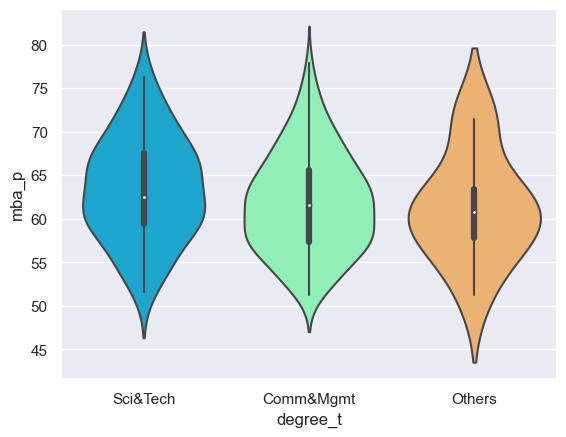

In [175]:
sns.violinplot(x="degree_t", y="mba_p", data=df,palette='rainbow')

<AxesSubplot:xlabel='degree_t', ylabel='mba_p'>

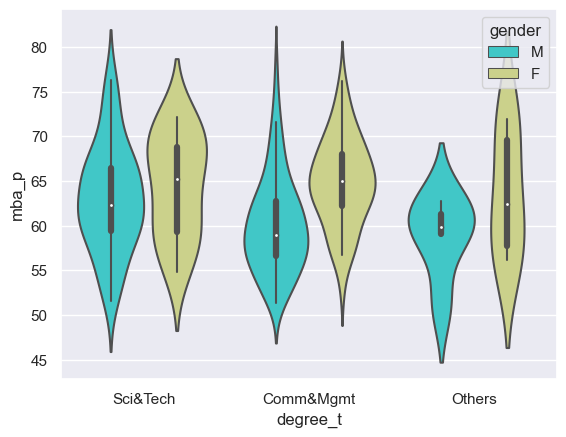

In [177]:
sns.violinplot(x="degree_t", y="mba_p", data=df,palette='rainbow',hue="gender")

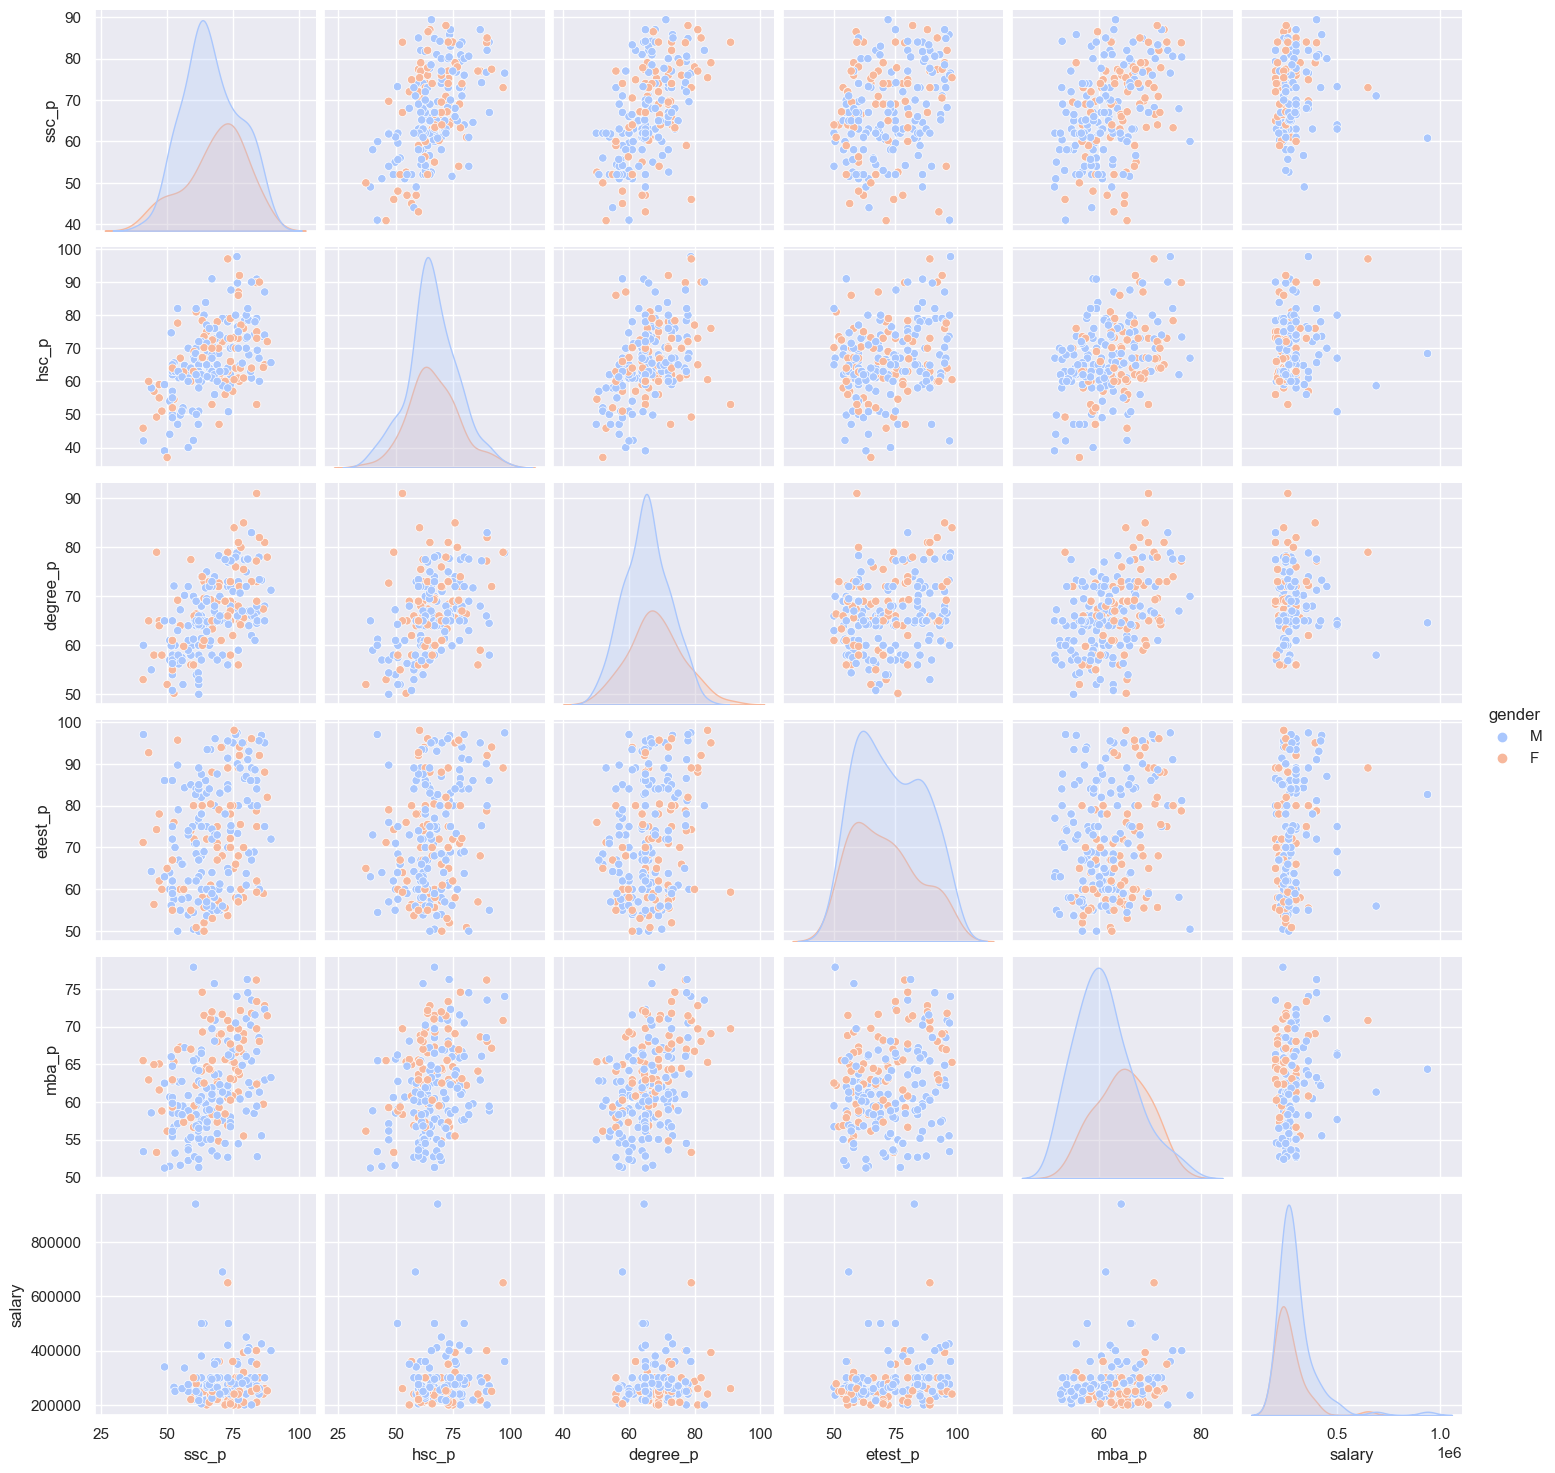

In [22]:
sns.pairplot(df,hue='gender',palette='coolwarm')

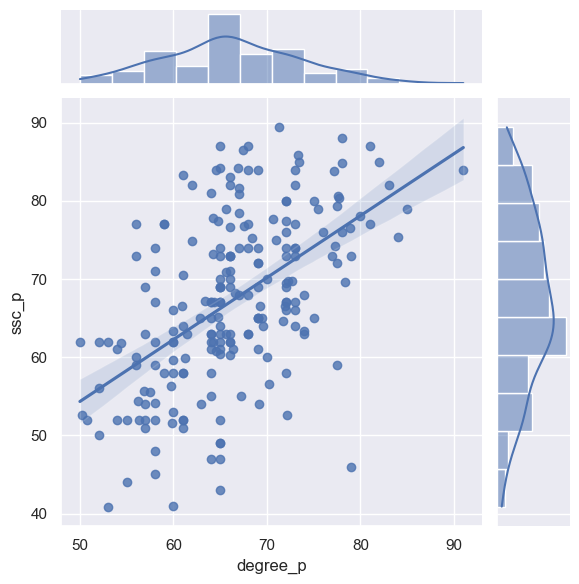

In [23]:
sns.jointplot(x="degree_p",y="ssc_p",data=df,kind='reg')


## Interpretation
symmetricetric: 
<pre>
seems like the data is roughly normally distributed,
symmetric histogram indicates that the data is distributed evenly around the center, 
with no significant skewness.
</pre>
right-skewed :
<pre>
seems like the data is  right-skewed distributed,
few extreme values on the right side of the histogram,
data is positively skewed.
</pre>
left-skewed
<pre>
seems like the data is  left-skewed distributed,
few extreme values on the left side of the histogram,
data is nagatively skewed.
</pre>